# Business Problem
Credit card fraud is when someone uses your credit card to make purchases that you didn't authorize. So, it is important for the companies to detect fraud transactions in which the credit card company's customers are not charged for unknown purchases. <br />
Problem is to identify fraudulent credit card transactions. Resources needed for the problem to solve is found in the Kaggle dataset.

In [1]:
# Libraries Imported 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('bmh')
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  plot_confusion_matrix,roc_curve, auc, roc_auc_score, classification_report, recall_score, confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, accuracy_score, recall_score
import statsmodels.api as sm

from sklearn.model_selection import GridSearchCV

import pandas as pd
pd.options.mode.chained_assignment = None 

from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from IPython.display import display

print("libraries imported")

libraries imported


# Data Exploratory Analysis
Now comes learning about data. Data that is available from Kaggle is in Excel format. Know about any missing values, duplicated values, distribution of variables "Amount" and "Time", correlation between variables is shown below.


In [2]:
# Import Dataset

data = pd.read_csv('creditcard.csv')

print ("Data Imported")

data.head(3)

Data Imported


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
# Names of the parameters/ varaibles in dataset
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
# Summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
# Dimensions of the data
data.shape

(284807, 31)

In [6]:
# Missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

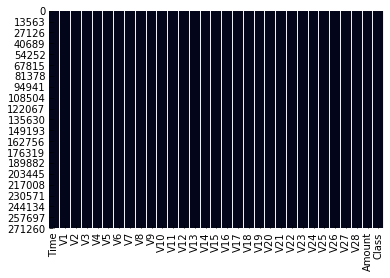

In [7]:
# Visualizing misssing values if any

sns.heatmap(data.isnull(), cbar=False)

In [8]:
# Copying into new file
df =data.copy()

In [9]:
# Duplicates values are dropped

df = df.drop_duplicates(keep = "last")

df.shape

(283726, 31)

In this project target variable as "Class" and the distribution is as follows 

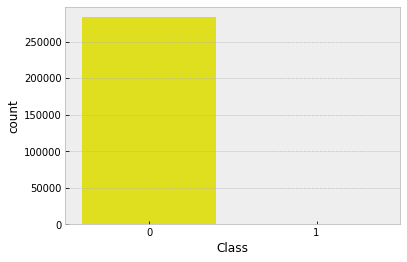

In [10]:
#Count of each "Class" variable
df.Class.value_counts()

#Visualize the "Class" variable

sns.countplot(x='Class', data=df, color= 'yellow')

Text(0.5, 1.0, 'Distribution of Amount Variable')

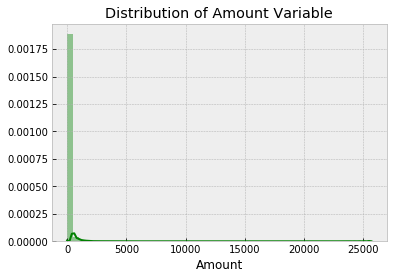

In [11]:
# Distribution plot of Amount

A=sns.distplot(df['Amount'], color = 'g')
plt.title("Distribution of Amount Variable")



Text(0.5, 1.0, 'Distribution of Time Variable')

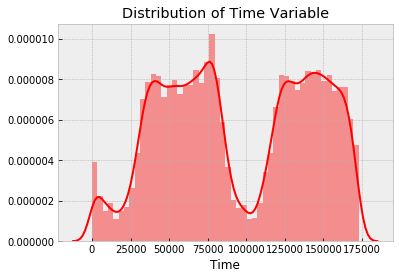

In [12]:
# Distribution plot of Time

T=sns.distplot(df['Time'], color = 'r')

plt.title("Distribution of Time Variable")

Both Amount and Time are not normally distributed so we need to scale the variables.
Remaining variables or Features V1, V2, … V28 are the principal components obtained with PCA.

In [13]:
# Summary of the data 
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [14]:
# Correlation vlaues

df.corr().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.09,-0.04,-0.01,...,0.05,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.01,-0.01,0.00,-0.01,0.00,-0.01,-0.00,0.00,...,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.02,-0.00,-0.23,-0.09
V2,-0.01,0.01,1.00,0.01,-0.00,0.01,-0.00,0.01,0.00,-0.00,...,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.01,0.00,-0.53,0.08
V3,-0.42,-0.01,0.01,1.00,0.00,-0.01,-0.00,-0.01,-0.00,-0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.01,-0.00,-0.21,-0.18
V4,-0.11,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,...,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.10,0.13
V5,0.17,-0.01,0.01,-0.01,0.00,1.00,-0.00,-0.01,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.01,-0.00,-0.39,-0.09
V6,-0.06,0.00,-0.00,-0.00,-0.00,-0.00,1.00,0.00,0.00,-0.00,...,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.22,-0.04
V7,0.09,-0.01,0.01,-0.01,0.00,-0.01,0.00,1.00,-0.01,-0.00,...,0.01,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.40,-0.17
V8,-0.04,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.01,1.00,0.00,...,0.02,-0.01,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.10,0.03
V9,-0.01,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,1.00,...,0.00,0.00,0.00,-0.00,-0.00,0.00,0.01,0.01,-0.04,-0.09


(Text(0.5, 1, 'Correlation Plot'),)

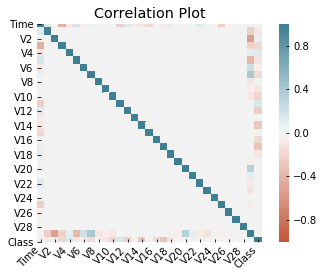

In [15]:
# Visualizing the correlation
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.title("Correlation Plot"),



# Data Preprocessing
In general, we need to split the data into three sets as Train, Validation, Test datasets.<br />
Here divided into two datasets with a train of 80% data and remaining 20% as test data.<br />
Next comes the variable selection in this we will scale the variables "Amount" and "Time".

In [16]:
# Separating target variable "Class" as Y
X = df.drop ('Class', axis=1)
Y = df['Class']

In [17]:
#Displaying the dimensions of X and Y
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

X shape:  (283726, 30)
Y shape:  (283726,)


In [18]:
#Split train and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=25, stratify= Y)

In [19]:
# Scaling for training dataset

scaler = StandardScaler()

X_train['scaled_amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_train['scaled_time'] = scaler.fit_transform(X_train['Time'].values.reshape(-1,1))

X_train.drop(['Time','Amount'], axis=1, inplace=True)

X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount',
       'scaled_time'],
      dtype='object')

In [20]:
# Dimensions of train sets
print(X_train.shape)
print(Y_train.shape)

(226980, 30)
(226980,)


Since the data is imbalanced data, it is better to apply sampling techniques. Here I used the SMOTE technique.
#### Synthetic Minority Oversampling Technique:
Oversampling the minority class without adding any new information to the model.
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space, and drawing a new sample at a point along that line. Implementation of SMOTE using python is easy and straight forward as shown below.

In [21]:
# Applying SMOTE for imbalanced data

sm = SMOTE(random_state=0)
sm.fit(X_train,Y_train)

x_train_sm, y_train_sm = sm.fit_resample(X_train, Y_train)


In [22]:
#Counting of each values in y_train_sm
y_train_sm.value_counts()


1    226602
0    226602
Name: Class, dtype: int64

# Model Selection 
In this project used two machine learning algorithm
1. Logistic Regression
2. Random Forest


#### Logistic Regression
Regression analysis is a form of predictive modeling technique which gives the relationship between dependent variable and independent variables. Regression analysis also indicates the strength of impact of multiple independent variables on dependent variable. It is used for building predictive models by evaluating most useful set of variables and eliminating variables which are redundant. There are various kinds of regression technique mainly depends on three aspects – type of dependent variable, number of independent variables, shape of regression line. Most common types of regression analysis are
·         Linear Regression
·         Logistic Regression
As said earlier, one of the important aspects in regression analysis is a type of dependent variable, in this project is churn which is binary categorical variable. Binary categorical variable has only two possible outcomes like 1 (yes) and 0 (no). In other words, if we are looking for mapping function (f) that can take a given vector of features (x) and predict a dependent variable (y) where ‘y’ is a categorical variable then is called classification. So, it is important for estimating the probability that x belongs to each of the categories of the dependent variable. In this scenario logistic regression is generally used which uses the logistic function because values strictly bounded ranges from 0 to 1.
For classification, we prefer probabilities between 0 and 1.
Let’s consider single variable model where
P(X)=(Y=1|X)
Logistic regression uses the form
<img src="pic1.png">
  
 
We use log () function “odds” and wrapped in the logarithm is called log odds or logit transformation of p(X) which is monotone transformation. Odds can vary from 0 to infinity.
 
The typical logistic regression model plot is shown below:

<img src="pic2.png">
                                  
Next comes, Maximum Likelihood is probabilistic framework for optimizing models and to estimate the parameters. It is the objective function for the model.
 <img src="pic3.png">
The above equation gives the probability of the observed zeros and ones in the data. We must pick ꞵ0 and  ꞵ to maximize the likelihood of the observed data points. The likelihood ‘L’ is high for P value closer to 1 when outcome is 1 and is closer to 0 when outcome is 0. Most statistical packages can fit linear logistic regression models by maximum likelihood. In R we use the glm() function to implement this model. The coefficient, β, in the logistic regression can be interpreted as follows. For every unit increase in X, the logarithm of the odds ratio of the Y increases by β.  
In this project, we have several independent variables and one dependent variable. So, the model will be in the form of
 
 <img src="pic4.png">                       
 
Key assumption in Logistic regression is that dependent variable should be discrete or categorical variable. Also, one of the flexibilities using logistic regression is that independent variable does not have to be in normal distribution.


In [24]:
#Defining logistic regression
lr_model = LogisticRegression()
print("Logistic Regression")

Logistic Regression


In [25]:
# Applying logistic regression to the training set
lr_model.fit(x_train_sm, y_train_sm)


LogisticRegression()

In [26]:
# Scaled test set

scaler = StandardScaler()

X_test['scaled_amount'] = scaler.fit_transform(X_test['Amount'].values.reshape(-1,1))
X_test['scaled_time'] = scaler.fit_transform(X_test['Time'].values.reshape(-1,1))

X_test.drop(['Time','Amount'], axis=1, inplace=True)

X_test.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount',
       'scaled_time'],
      dtype='object')

In [27]:
# prediction on test set

pred = lr_model.predict(X_test)

#### Evaluation Metrics

In [ ]:
# summarize feature importance
for i,v in enumerate(importance):
      print('Feature: %0d, Score: %.5f' % (i,v))

In [28]:
# Classification Report

print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.89      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.94      0.55     56746
weighted avg       1.00      0.98      0.99     56746



In [29]:
#Confusion Matrix

print(confusion_matrix(Y_test, pred))

[[55284  1367]
 [   10    85]]


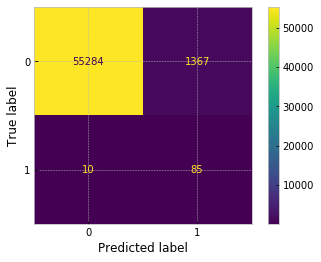

In [30]:
#plotting confusion matrix 

plot_confusion_matrix(lr_model, X_test, Y_test)  
plt.show()

#Accuracy references not sure right or wrong
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr_model.score(X_test, Y_test)))

In [36]:
# Calculating accuracy , recall , ROC

accuracy = float('%.3f' % accuracy_score(Y_test, pred))
ROCAUC =  float('%.3f' % roc_auc_score(Y_test, pred))
recall = float('%.3f' % recall_score(Y_test, pred))

print('Accuracy:', accuracy)
print('ROC AUC Score:', ROCAUC)
print('Recall Score:', recall)


Accuracy: 0.976
ROC AUC Score: 0.935
Recall Score: 0.895
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.89      0.11        95

    accuracy                           0.98     56746
   macro avg       0.53      0.94      0.55     56746
weighted avg       1.00      0.98      0.99     56746



In [32]:
# Function for plotting roc

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

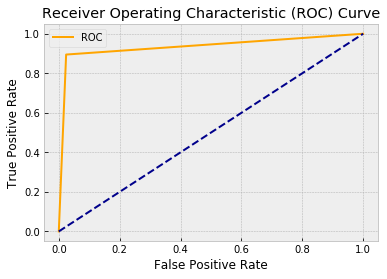

In [33]:
#Plot roc curve

fpr, tpr, thresholds = roc_curve(Y_test, pred)
plot_roc_curve(fpr, tpr)

#### Random Forest


In [37]:
#Defining random forest model
rf_model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
print("Random Forest Model")

Random Forest Model


In [38]:
#Applying random forest model to the training set
rf_model.fit(x_train_sm, y_train_sm)

RandomForestClassifier(max_features='sqrt')

In [39]:
# Actual class predictions for test set

rf_pred = rf_model.predict(X_test)


#### Evaluation Metrics

In [40]:
#Classification Report

print(classification_report(Y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.88      0.82      0.85        95

    accuracy                           1.00     56746
   macro avg       0.94      0.91      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [41]:
#Confusion Matrix

print(confusion_matrix(Y_test, rf_pred))

[[56640    11]
 [   17    78]]


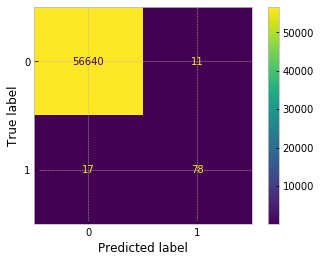

In [42]:
#plotting confusion matrix 

plot_confusion_matrix(rf_model, X_test, Y_test)  # doctest: +SKIP
plt.show()

In [43]:
# Calculating accuracy , recall , ROC

accuracy = float('%.3f' % accuracy_score(Y_test, rf_pred))
ROCAUC =  float('%.3f' % roc_auc_score(Y_test, rf_pred))
recall = float('%.3f' % recall_score(Y_test, rf_pred))

print('Accuracy:', accuracy)
print('ROC AUC Score:', ROCAUC)
print('Recall Score:', recall)

Accuracy: 1.0
ROC AUC Score: 0.91
Recall Score: 0.821


In [44]:
# Function for plotting roc

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

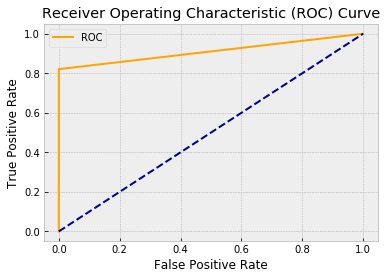

In [45]:
#Plot roc curve

fpr, tpr, thresholds = roc_curve(Y_test, rf_pred)
plot_roc_curve(fpr, tpr)

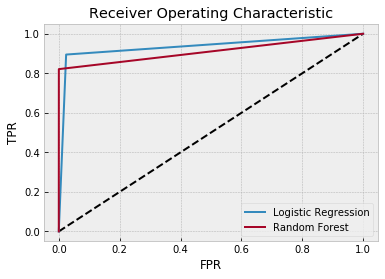

In [48]:
#Plotting ROC for both logistic regression and random forest models

fpr1, tpr1, thresholds1 = roc_curve(Y_test, pred)
fpr2, tpr2, thresholds2 = roc_curve(Y_test, rf_pred)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic Regression")
plt.plot(fpr2, tpr2, label= "Random Forest")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic-ROC')
plt.show()

# Model Building
For this project used Python programming language Jupyter Notebook.

# Operation

# References

https://ciowiki.org/wiki/Data_Analytics#:~:text=Data%20analytics%20refers%20to%20qualitative,enhance%20productivity%20and%20business%20gain.&text=These%20systems%20transform%2C%20organize%2C%20and,draw%20conclusions%20and%20identify%20patterns.
https://www.informatica.com/services-and-training/glossary-of-terms/data-analytics-definition.html
https://www.sas.com/en_us/insights/analytics/big-data-analytics.html
https://www.itl.nist.gov/div898/handbook/pmd/section4/pmd41.htm
https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
https://beckernick.github.io/oversampling-modeling/